In [3]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
df=pd.read_csv("netflix_titles.csv")
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [35]:
# clean data
clean_df=df.dropna(axis=0,how='any')
print(clean_df.head())

   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdo

In [37]:
# check datatypes and non-null count
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


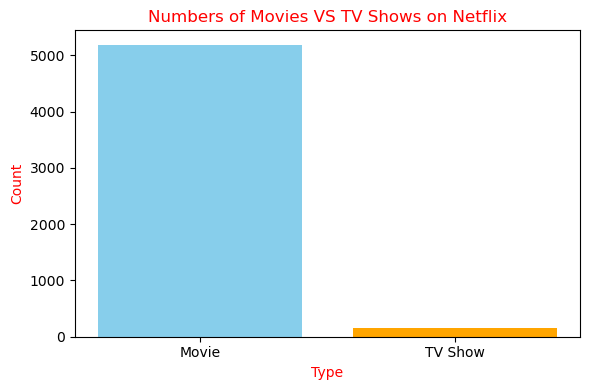

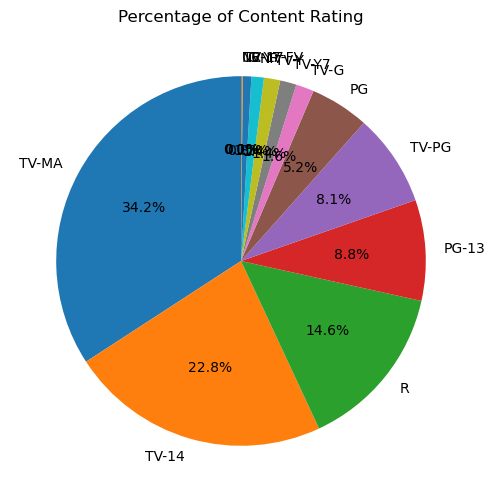

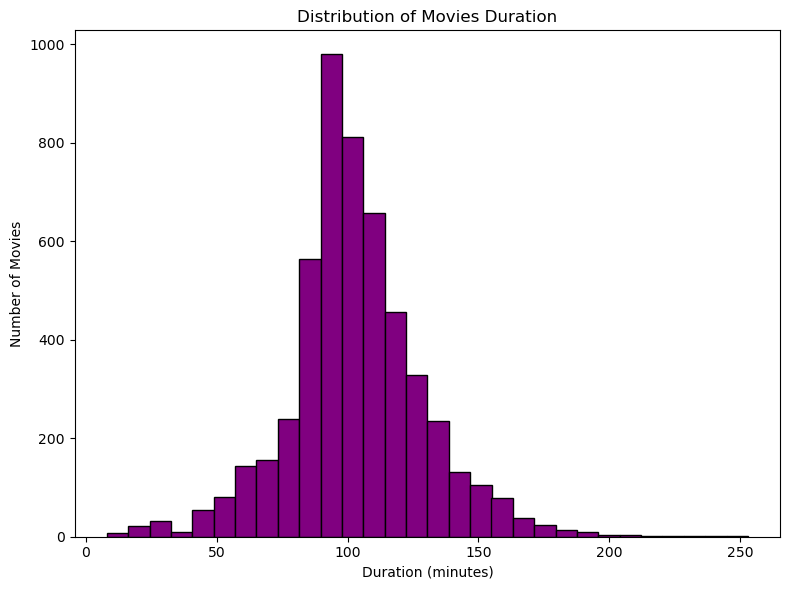

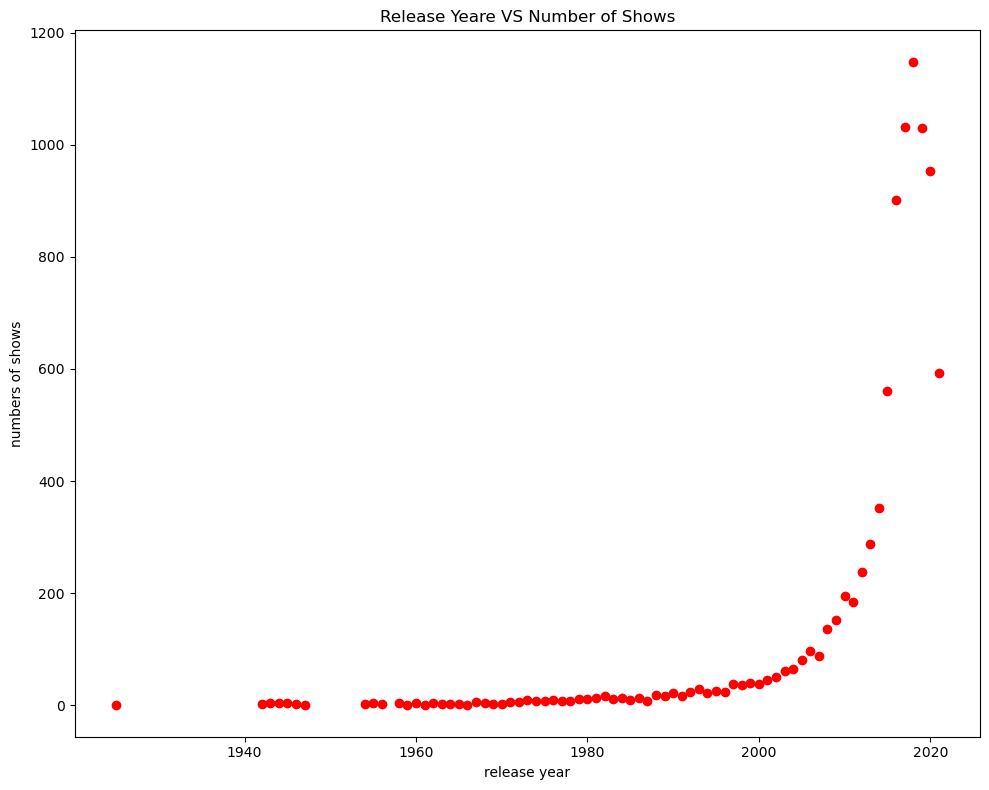

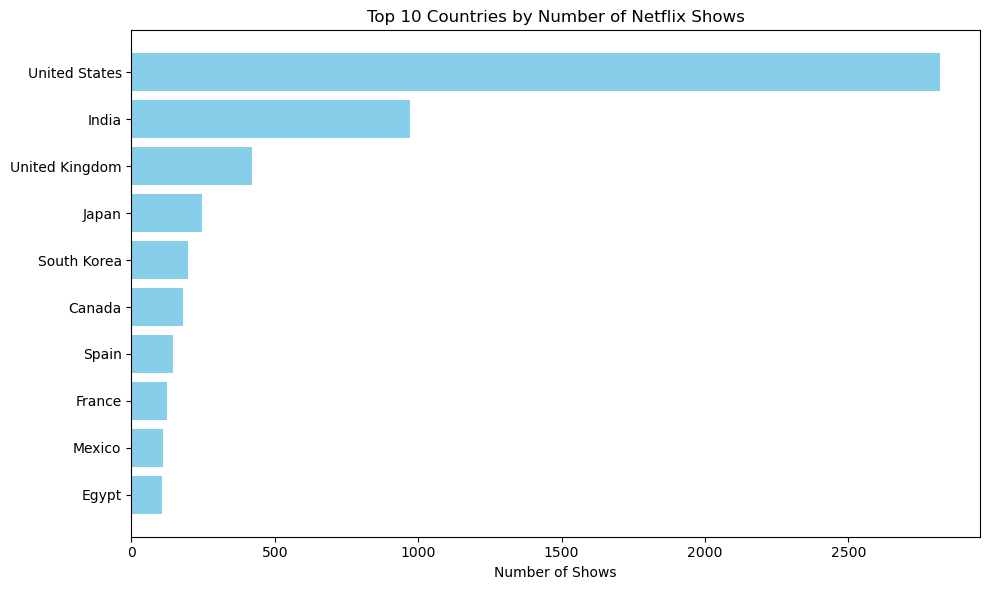

In [91]:
# Bar chart
type_count=clean_df["type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=["skyblue","orange"])
plt.title("Numbers of Movies VS TV Shows on Netflix",color="red")
plt.xlabel("Type",color="red")
plt.ylabel("Count",color="red")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()

# Pie chart
rating_count = clean_df["rating"].value_counts()

plt.figure(figsize=(8,6))
plt.pie(
    rating_count.values,
    labels=rating_count.index,
    autopct="%1.1f%%",   # Corrected: single % sign + 'f' for float
    startangle=90,
)
plt.title("Percentage of Content Rating")
plt.savefig("Content_Rating_pie.png")
plt.show()

# Histogram
movie_df=clean_df[clean_df["type"]=="Movie"].copy()
movie_df["duration_int"]=movie_df["duration"].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df["duration_int"],bins=30,color="purple",edgecolor="black")
plt.title("Distribution of Movies Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("Duration_histogram.png")
plt.show()

# Scatter Plot
release_count=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,8))
plt.scatter(release_count.index,release_count.values,color="red")
plt.title("Release Yeare VS Number of Shows")
plt.xlabel("release year")
plt.ylabel("numbers of shows")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

# horizontal bar chart
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel("Number of Shows")
plt.title("Top 10 Countries by Number of Netflix Shows")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.savefig("Top10_Countries_Shows.png")
plt.show()